# Properties of RG-58

This example demonstrates how to use skrf's to explore some properties of Coax (RG-58). This is done through the `media` package which provides basic transmission line models. Specifically, the coax is created using  by `DistributedCircuit`.

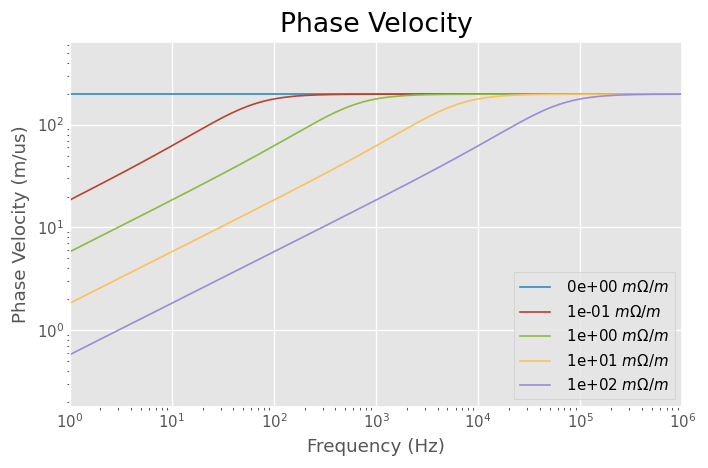

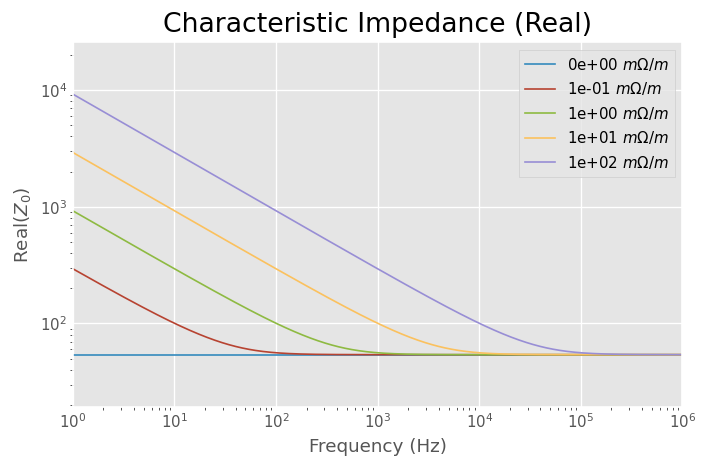

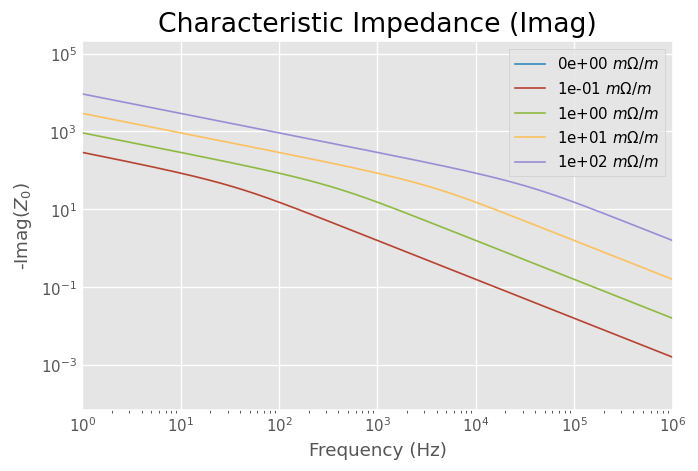

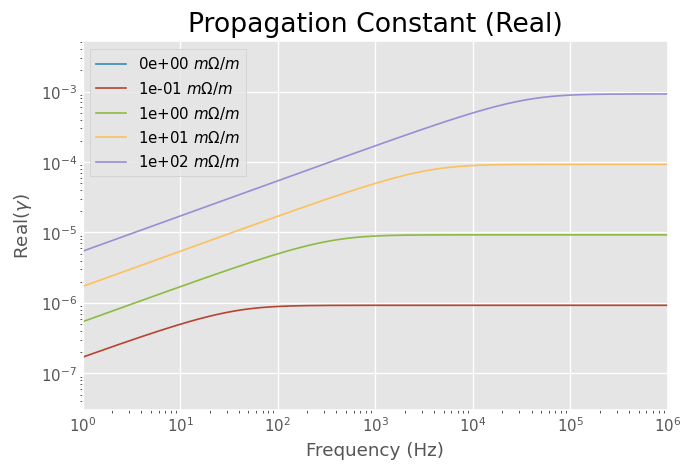

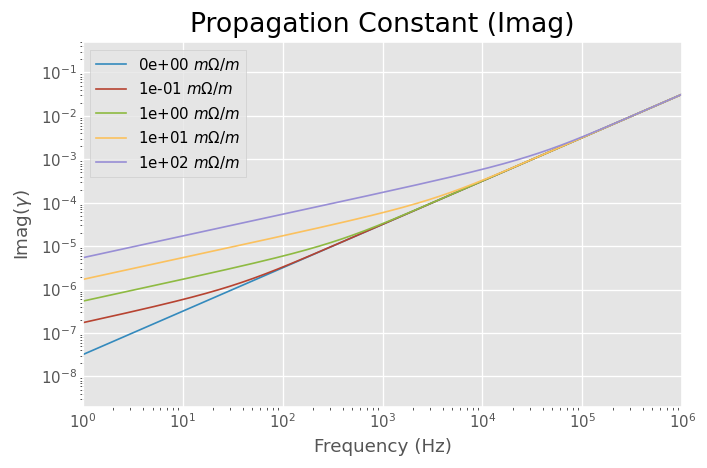

In [1]:
import skrf as rf
from skrf.media import DistributedCircuit
%matplotlib inline
from pylab import * 
rf.stylely()



# define a frequency object from a vector
freq = rf.F.from_f(logspace(0,6,1001), unit='hz') 

# create a Media object for RG-58, based on distributed ckt values
rg58 = DistributedCircuit(
    frequency = freq,
    C =93.5e-12,#F/m 
    L =273e-9,  #H/m
    R =0,#53e-3,   #Ohm/m 
    G =0,       #S/m
    )


# loop thru values of resistivity and plot various quantities
for k in (0,.1,1,10,100):    
    rg58.R = k*1e-3
    
    figure(0)
    ylabel('Phase Velocity (m/us)')
    title('Phase Velocity')
    loglog(freq.f_scaled, rg58.v_p*1e-6, label=r' %1.e $m \Omega/m $'%k)
    
    figure(1)
    ylabel('Real($Z_0$)')
    title('Characteristic Impedance (Real)')
    loglog(freq.f_scaled, rg58.z0.real, label=r'%1.e $m \Omega/m $'%k)
    
    figure(2)
    ylabel('-Imag($Z_0$)')
    title('Characteristic Impedance (Imag)')
    try:
        plot(freq.f_scaled, -1*rg58.z0.imag, label=r'%1.e $m \Omega/m $'%k)
    except:
        pass
        
    figure(3)
    ylabel('Real($\gamma$)')
    title('Propagation Constant (Real)')   
    try:
        plot(freq.f_scaled, rg58.alpha, label=r'%1.e $m \Omega/m $'%k)
    except:
        pass
    
    figure(4)
    ylabel('Imag($\gamma$)')
    title('Propagation Constant (Imag)')
    try:
        plot(freq.f_scaled, rg58.beta, label=r'%1.e $m \Omega/m $'%k)
    except:
        pass
        
    

    
from skrf.plotting import func_on_all_figs as foaf

foaf(freq.labelXAxis)
foaf(tight_layout)
foaf(legend)
foaf(loglog)

tight_layout()
